In [1]:
import nltk
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
data = pd.read_csv('spam.csv')
data

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [3]:
def numerize_label(x):
    if x == 'ham':
        return 0
    return 1

def data_lenght(text):
    lenght = len(text)
    return lenght

data['type'] = data['type'].apply(lambda x: numerize_label(x)) # spam = 1, ham = 0
data['text_lenght'] = data['text'].apply(lambda x: data_lenght(x))

In [4]:
data

,type,text,text_lenght
0,0,Hope you are having a good week. Just checking in,49
1,0,K..give back my thanks.,23
2,0,Am also doing in cbe only. But have to pay.,43
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,1,okmail: Dear Dave this is your final notice to...,161
...,...,...,...
5554,0,You are a great role model. You are giving so ...,245
5555,0,"Awesome, I remember the last time we got someb...",88
5556,1,"If you don't, your prize will go to another cu...",145
5557,1,"SMS. ac JSco: Energy is high, but u may not kn...",154


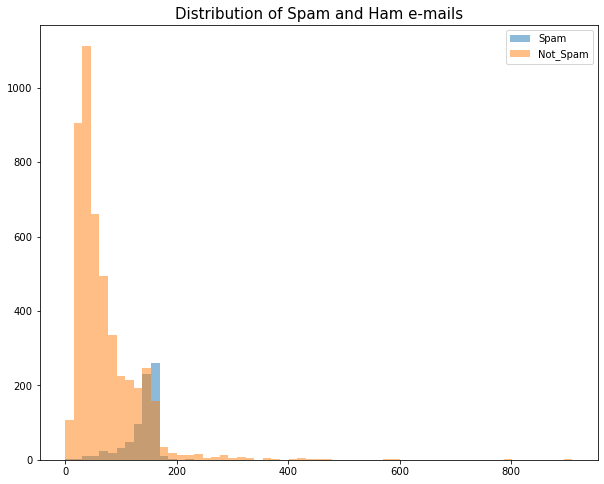

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

bins = np.linspace(0, max(data['text_lenght']), 60)
plt.figure(figsize = (10,8))
plt.hist(data[data['type'] == 1]['text_lenght'], bins = bins, alpha = 0.5, label = 'Spam')
plt.hist(data[data['type'] == 0]['text_lenght'], bins = bins, alpha = 0.5, label = 'Not_Spam')
plt.title('Distribution of Spam and Ham e-mails', size = 15)
plt.legend(loc = 'best')
plt.show()

In [5]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['text'])
X_features =  pd.DataFrame(X_tfidf.toarray())
X_features['text_lenght'] = data['text_lenght']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
X_features

,0,1,2,3,4,5,6,7,8,9,...,8052,8053,8054,8055,8056,8057,8058,8059,8060,text_lenght
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,245
5555,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
5556,0.118952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145
5557,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154


In [8]:
# Gradient Boosting Algorithm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
gb = GradientBoostingClassifier()
params = {'n_estimators' : [100, 150],
          'max_depth' : [7, 11, 15],
          'learning_rate' : [0.2, 0.1, 0.01]}
grid = GridSearchCV(estimator = gb, param_grid = params, cv = 4, scoring = 'accuracy', verbose = 1, n_jobs = -1)
model = grid.fit(X_features, data['type'])
grid.best_params_

In [ ]:
params_df = pd.DataFrame(model.cv_results_).sort_values('mean_test_score', 
                                                        ascending = False)[0:7]
params_df

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['type'], 
                                                    test_size = 0.25, random_state = 101)

model = GradientBoostingClassifier(n_estimators = 100, max_depth = 15, learning_rate = 0.1, 
                                   verbose = 1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification report: \n', classification_report(y_test, prediction))

Confusion matrix: 
 [[1202   11]
 [  29  148]]
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1213
           1       0.93      0.84      0.88       177

    accuracy                           0.97      1390
   macro avg       0.95      0.91      0.93      1390
weighted avg       0.97      0.97      0.97      1390



In [8]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [9]:
rf = RandomForestClassifier()
params = {'n_estimators' : [100, 150],
          'max_depth' : [7, 11, 15],}
grid = GridSearchCV(estimator = rf, param_grid = params, cv = 4, scoring = 'accuracy', 
                    verbose = 1, n_jobs = -1)
grid.fit(X_features, data['type'])
grid.best_params_

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.2min finished


{'max_depth': 15, 'n_estimators': 150}

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['type'], test_size = 0.25)

rf = RandomForestClassifier(n_estimators = 150, max_depth = 15, n_jobs = -1)
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)

print('Confusion matrix: \n', confusion_matrix(y_test, prediction))
print('\n')
print('Classification report: \n', classification_report(y_test, prediction))

Confusion matrix: 
 [[1204    0]
 [ 103   83]]


Classification report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1204
           1       1.00      0.45      0.62       186

    accuracy                           0.93      1390
   macro avg       0.96      0.72      0.79      1390
weighted avg       0.93      0.93      0.91      1390

